# Air Passenger Time Series Forecasting

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pycaret
import kaleido
from pycaret.time_series import *

## EDA

In [2]:
airpassenger = pd.read_csv('AirPassengers.csv')
airpassenger.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
airpassenger.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
airpassenger.shape

(144, 2)

In [5]:
airpassenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
airpassenger['Month'] = pd.to_datetime(airpassenger['Month'], format='%Y-%m')
airpassenger = airpassenger.set_index('Month')
airpassenger.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


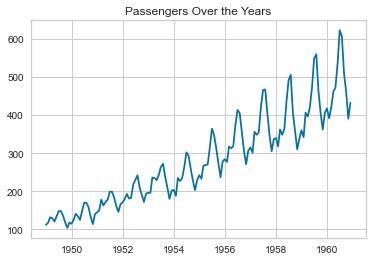

In [7]:
plt.plot(airpassenger)
plt.title('Passengers Over the Years')
plt.grid(True)
plt.show()

In [8]:
# Setup PyCaret
# cross validation will be 3 and forecast horizon will be 12 (last 12 points in dataset will be used as test)
s = setup(airpassenger, fold = 3, fh = 12, session_id = 123)
setup_results = pull()
print(setup_results)

,Description,Value
0,session_id,123
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


                                         Description                    Value
0                                         session_id                      123
1                                             Target              #Passengers
2                                           Approach               Univariate
3                                Exogenous Variables              Not Present
4                                Original data shape                 (144, 1)
5                             Transformed data shape                 (144, 1)
6                        Transformed train set shape                 (132, 1)
7                         Transformed test set shape                  (12, 1)
8                           Rows with missing values                     0.0%
9                                     Fold Generator  ExpandingWindowSplitter
10                                       Fold Number                        3
11                       Enforce Prediction Interval            

In [9]:
s.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


Since the p-value of the Ljung-Box test is less than 0.05, we can assume that the values are showing dependence on each other. This time series is not stationary because the ADF p-value is greater than 0.05. Since we also cannot reject the null hypothesis of the KPSS test (p-value greater than 0.05), where the null hypothesis is stationary, we observe that the series is stationary around a deterministic trend (slope of the trend in the series does not change permanently). With the p-value of the Shapiro less than 0.05, we reject the null hypothesis and there is evidence that the data tested are not normally distributed.

In [10]:
# Time Series plot
plot_model(plot = 'ts', fig_kwargs={'hoverinfo':'none'})

Upward trend throughout the years. There is a seasonal variation as there are peaks in July or August. There is a mulitplicative seasonal variability with an additive trend.

In [11]:
# Train and Test Plot
plot_model(plot='train_test_split', fig_kwargs={'hoverinfo':'none'})

In [12]:
# Cross Validation plot
plot_model(plot = 'cv', fig_kwargs={'hoverinfo':'none'})

In [13]:
# Diagnostic plot
plot_model(plot='diagnostics', fig_kwargs={'hoverinfo':'none'})

The periodogram shows possible cyclical behavior in a time series. The time series is recomposed using a sum of cosine waves with varying amplitudes and frequencies. This time series are mostly equal amplitude, but further out cosine waves. ACF is the measure of correlation between two datapoints and how that changes as the distance between them increases. As we can see in the ACF plot, the autocorrelations are decreasing slowly with the increasing lags, indicating that the time series is non-stationary. PACF is a conditional correlation between two datapoints assuming we know their dependencies with another set of datapoints. The PACF shows that the first and second lagged values have a clear statistical significance with regards to their partial autocorrelations. We can see on the QQ plot, the ends are tailing off towards the end, showing the distribution being not Normally distributed. 

## Decomposition Plot

I will plot a multiplicative decomposition plot. Multiplicative decomposition is that the time series is the product of its components.

In [14]:
# Decomposition Plot
plot_model(plot='decomp', data_kwargs={'type': 'multiplicative'}, fig_kwargs={'hoverinfo':'none'})

There is an upward trend and seasonality present based on the decomposition results. The residuals show an interesting result as there is high variability in early and later years.

## Differencing

I will now perform differencing on this time series with both first difference, and first difference with seasonal difference.
First row: Original time series
Second row: First differencing
Third row: First difference with seasonal differencing

In [15]:
plot_model(plot='diff', data_kwargs={'lags_list': [[1], [1, 12]], 'acf': True, 'pacf':True}, fig_kwargs={'hoverinfo':'none'})

As we observe these results, the first difference with seasonal differencing shows stationarity since the ACF plot displays the ACF quickly dropping to zero. First difference with seasonal differencing has the best results to show stationarity.

# Modeling

Now, I will utilize the compare_models() function in PyCaret, which trains and compares the performance of all estimators available in the library, while using cross-validation. 

In [16]:
best = compare_models()
model_results = pull()
print(model_results)

Processing:   0%|          | 0/125 [00:00<?, ?it/s]

                                                             Model    MASE  \
exp_smooth                                   Exponential Smoothing  0.5852   
ets                                                            ETS  0.5931   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending  0.6596   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending  0.6813   
arima                                                        ARIMA   0.683   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending  0.7004   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending  0.7004   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...  0.7004   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending  0.7029   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending  0.7048   
catboost_cds_dt  CatBoost Regressor w/ Cond. Deseasonalize & De...  0.7106   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren.

Based on the results, the Exponential Smoothing model generates the best model for this time series as the RMSE is the lowest out of all models and its R2 score is the highest out of all models. The RMSE indicates that predictions do not fall far from actual values and R2 exhibits how much of the dependent variable is predictable from the independent variable. 

I will now plot the out-of-sample forecasting performance and the in-sample plots using the exponential smoothing model. 

In [18]:
plot_model(best, plot = 'forecast', fig_kwargs={'hoverinfo':'none'})
plot_model(best, plot = 'insample', fig_kwargs={'hoverinfo':'none'})

The plots show us that the exponential smoothing model generates good results when comparing predictions to actual data. 

I will now create a forecast plot for the next 60 months using this exponential smoothing model.

In [19]:
plot_model(best, plot = 'forecast', data_kwargs={'fh': 60}, fig_kwargs={'hoverinfo':'none'})

I will now output the predictions of passengers for 60 months from January 1960 to December 1964.

In [19]:
predict_model(best, fh=np.arange(1, 61))

,y_pred
1960-01,417.2810
1960-02,394.0567
1960-03,462.4373
1960-04,448.5887
1960-05,471.8593
1960-06,539.8763
1960-07,623.8054
1960-08,631.1408
1960-09,515.5723
1960-10,449.8958


I will now produce the diagnostics plot for the exponential smoothing model.

In [20]:
plot_model(best, plot='diagnostics', fig_kwargs={'hoverinfo':'none'})

From the diagnostics plot, the histogram is now normally distributed and that can be confirmed with the QQ Plot has a near straight line. The ACF drops to zero relatively quickly with 2 significant flags, and the PACF cuts off after lag 1.

## Model Tuning

In [22]:
expsmooth_tune = tune_model(best)
print(best)
print(expsmooth_tune)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3617,0.4124,10.5620,13.4978,0.0272,0.0273,0.9407
1,1957-12,0.8588,0.8856,26.2573,30.0652,0.0738,0.0704,0.7632
2,1958-12,0.3942,0.4126,11.2644,13.4112,0.0261,0.0265,0.9598
Mean,nan,0.5382,0.5702,16.0279,18.9914,0.0424,0.0414,0.8879
SD,nan,0.2271,0.2230,7.2390,7.8304,0.0222,0.0205,0.0885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


ExponentialSmoothing(seasonal='mul', sp=12, trend='add')
ExponentialSmoothing(seasonal='add', sp=12, trend='additive', use_boxcox=True)


The tuned exponential smoothing model has a better MASE, MAE, RMSE, and MAPE have lower values compared to the non-tuned model.

In [23]:
# Tuned model performance
pred_expsmooth = predict_model(expsmooth_tune)
plot_model(expsmooth_tune, fig_kwargs={'hoverinfo':'none'})
plot_model(expsmooth_tune, plot='insample', fig_kwargs={'hoverinfo':'none'})

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,0.5858,0.6575,17.8364,22.7139,0.0375,0.0364,0.9069


As we can see, performance is better than the previous one.
Let's forecast the next 60 points of future passengers with this tuned exponential smoothing model.

In [24]:
plot_model(expsmooth_tune, plot = 'forecast', data_kwargs={'fh': 60}, fig_kwargs={'hoverinfo':'none'})

In [25]:
predict_model(expsmooth_tune, fh=np.arange(1, 61))

,y_pred
1960-01,421.1026
1960-02,401.0329
1960-03,470.9998
1960-04,460.4431
1960-05,485.2459
1960-06,556.8663
1960-07,638.3336
1960-08,643.5432
1960-09,529.1200
1960-10,464.7396


In [25]:
plot_model(expsmooth_tune, plot='diagnostics', fig_kwargs={'hoverinfo':'none'})

There is not a huge difference between the tuned model and non-tuned model, however, since it is slightly better, we will stick to the tuned exponential smoothing model.

In [26]:
save_model(expsmooth_tune, 'exp_smooth_tune_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ExponentialSmoothing(seasonal='add',
                                                                                      sp=12,
                                                                                      trend='additive',
                                                                                      use_boxcox=True))]))]),
 'exp_smooth_tune_model.pkl')

In [27]:
# Load model
load_final_model = load_model('exp_smooth_tune_model')

Transformation Pipeline and Model Successfully Loaded
